In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.preprocessing import image
from keras_vggface.utils import preprocess_input
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data/labels.csv") #reading the created labelled data
data

,Image code,label
0,2021-04-07 21_36_40_exai_rpi_004_51,0
1,2021-04-07 21_37_18_exai_rpi_001_58,0
2,2021-04-07 21_39_06_exai_rpi_001_85,1
3,2021-04-07 21_39_20_exai_rpi_004_91,0
4,2021-04-07 21_40_10_exai_rpi_001_101,1
5,2021-04-07 21_43_40_exai_rpi_004_156,1
6,2021-04-07 21_45_00_exai_rpi_004_176,0


In [3]:
labels = np.asarray(data["label"])

In [4]:
data_array = data.values
images=[]
for i in range(len(data_array)):
    img = 'data/'+ str(data_array[i][0]) +'.jpg' #replacing the image name with corresponding path
    images.append(img)
print(len(images))

data["Images"] = images
data = data[["Images", "label"]]
data_array = data.values
data_array

7


array([['data/2021-04-07 21_36_40_exai_rpi_004_51.jpg', 0],
       ['data/2021-04-07 21_37_18_exai_rpi_001_58.jpg', 0],
       ['data/2021-04-07 21_39_06_exai_rpi_001_85.jpg', 1],
       ['data/2021-04-07 21_39_20_exai_rpi_004_91.jpg', 0],
       ['data/2021-04-07 21_40_10_exai_rpi_001_101.jpg', 1],
       ['data/2021-04-07 21_43_40_exai_rpi_004_156.jpg', 1],
       ['data/2021-04-07 21_45_00_exai_rpi_004_176.jpg', 0]], dtype=object)

In [5]:
#Use this to foolowings functions to use unprocessed data
# def load_img(path):
#     img = Image.open(path).resize((224,224))
#     img = np.asarray(img)  
#     return img

In [6]:
# def view_img(images):
#     for i in range(len(images)):
#         images[i] = load_img(images[i])
#     return images

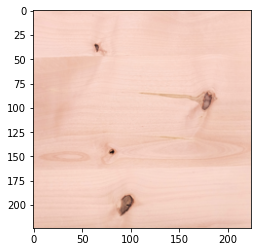

In [7]:
# view_img(images)
# images = np.asarray(images)
# plt.imshow(images[2])

In [5]:
#Use this function to load preprocessed data
def read_img(path):
    img = image.load_img(path, target_size=(224, 224))
    img = np.array(img).astype(np.float)
    return preprocess_input(img, version=2)

In [6]:
def assign_img(images):
    for i in range(len(images)):
        images[i] = read_img(images[i])
    return images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


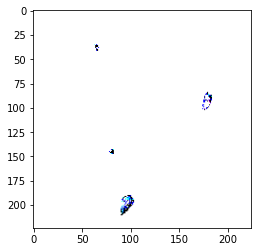

In [7]:
assign_img(images)
images = np.asarray(images)
plt.imshow(images[2])

In [8]:
#np.save("processed_images.npy", images)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.25, random_state=1) #using images for validation

In [9]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5, 224, 224, 3), (5,), (2, 224, 224, 3), (2,))

In [10]:
# data_augmentation = tf.keras.Sequential([
#   layers.Rescaling(1./255, input_shape=(X_train[0].shape[0], X_train[0].shape[1], 3)),
#   layers.RandomFlip("horizontal_and_vertical"),
#   layers.RandomRotation(0.2),
#   layers.RandomContrast(0.5)
# ])

# image1 = X_train[2]
# image1 = tf.expand_dims(image1, 0)

# plt.figure(figsize=(10, 10))
# for i in range(16):
#   augmented_image = data_augmentation(image1)
#   ax = plt.subplot(4, 4, i + 1)
#   plt.imshow(augmented_image[0])
#   plt.axis("off")

In [10]:
#building our model
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(X_train[0].shape[0], X_train[0].shape[1], 3)),
  #the preprocessing layercreated earlier.
  #data_augmentation, #To be used to integrate data augmentation to our model
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)   
])
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [12]:
#history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(  #Using data augmentation before fitting to the model
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
datagen.fit(X_train)

training_set = datagen.flow(X_train, Y_train)

history = model.fit(training_set, validation_data=(X_test, Y_test), epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 866ms/step - loss: 5.2154 - accuracy: 0.6000 - val_loss: 4.4505 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 159ms/step - loss: 3.5839 - accuracy: 0.4000 - val_loss: 4.4012 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 174ms/step - loss: 4.0275 - accuracy: 0.4000 - val_loss: 4.2199 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 181ms/step - loss: 2.5440 - accuracy: 0.4000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 177ms/step - loss: 0.7421 - accuracy: 1.0000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 164ms/step - loss: 0.7294 - accuracy: 0.6000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 181ms/step - loss: 0.7401 - accuracy: 0.6000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 8/20
1/1 [====

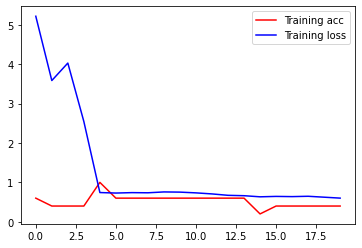

In [12]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

Due to low data our model can't perform very well.
A different could also be to use transfer learning by using a pretrained model

In [13]:
model.save("model.h5")

To improve this model, we should increase our database.

For to use transfer learning to apply to other surfaces, we can use our model as the baseline of the future model. That is being the first layer of the new model which will have pretrained weights.